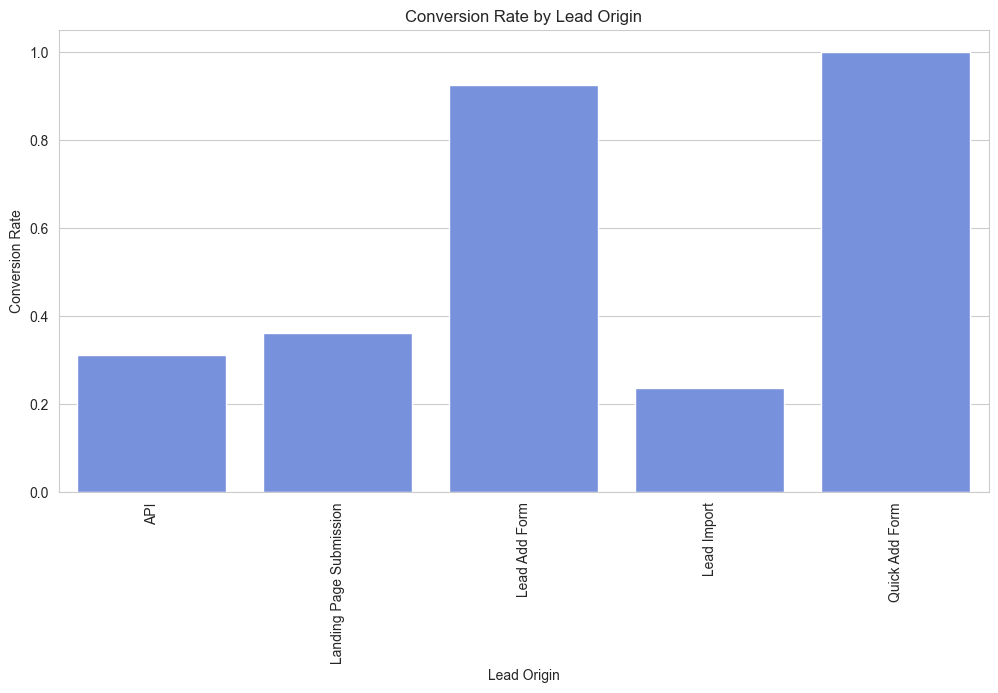

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

df=pd.read_csv("cleandata.csv")

# Hypothesis 1: Leads from certain origins have a higher conversion rate
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby("Lead Origin")["Converted"].mean().index, 
            y=df.groupby("Lead Origin")["Converted"].mean().values)
plt.title("Conversion Rate by Lead Origin")
plt.ylabel("Conversion Rate")
plt.xlabel("Lead Origin")
plt.xticks(rotation=90)
plt.show()


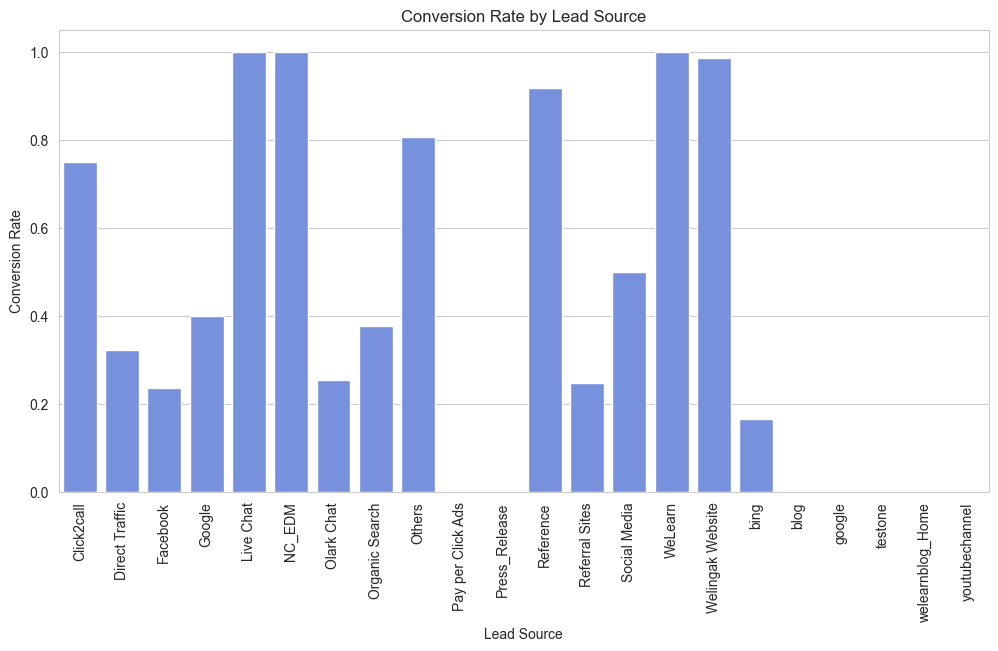

In [12]:
# Hypothesis 2: Leads from certain sources have a higher conversion rate
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby("Lead Source")["Converted"].mean().index, 
            y=df.groupby("Lead Source")["Converted"].mean().values)
plt.title("Conversion Rate by Lead Source")
plt.ylabel("Conversion Rate")
plt.xlabel("Lead Source")
plt.xticks(rotation=90)
plt.show()

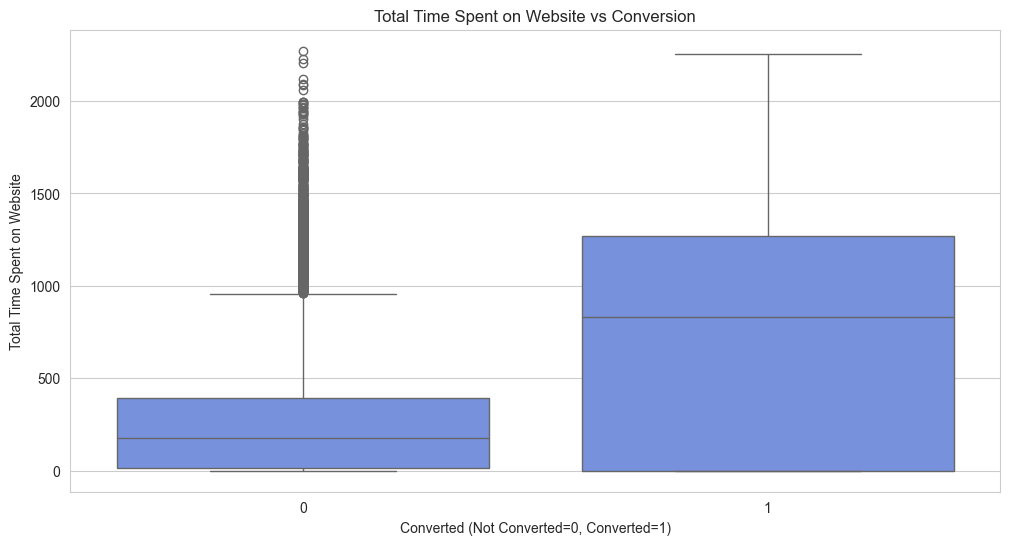

In [13]:
# Hypothesis 3: More time spent on the website increases the conversion rate
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Converted"], y=df["Total Time Spent on Website"])
plt.title("Total Time Spent on Website vs Conversion")
plt.xlabel("Converted (Not Converted=0, Converted=1)")
plt.ylabel("Total Time Spent on Website")
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_20476\3696873893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Converted"], y=df["Page Views Per Visit"], palette="coolwarm")


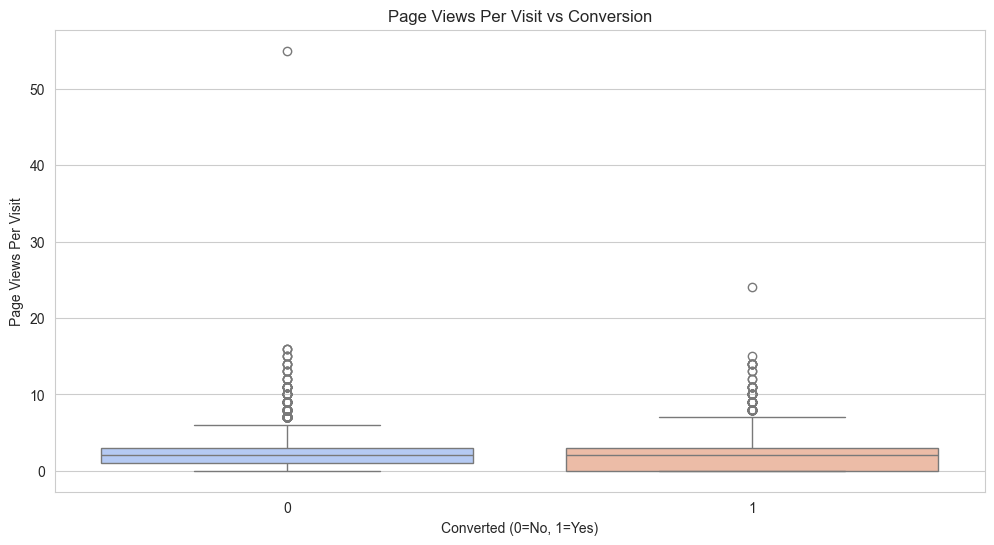

In [14]:
# Hypothesis 4: Higher page views per visit lead to better conversions
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Converted"], y=df["Page Views Per Visit"], palette="coolwarm")
plt.title("Page Views Per Visit vs Conversion")
plt.xlabel("Converted (0=No, 1=Yes)")
plt.ylabel("Page Views Per Visit")
plt.show()

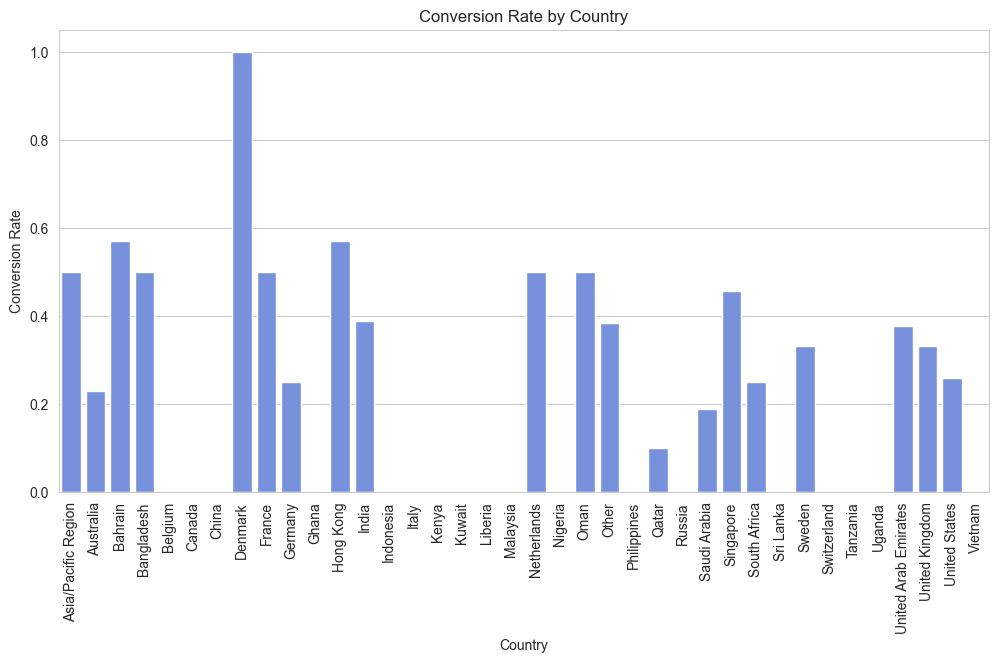

In [ ]:
# Hypothesis 6: Country-wise conversions show differencesg
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby("Country")["Converted"].mean().index, 
            y=df.groupby("Country")["Converted"].mean().values)
plt.title("Conversion Rate by Country")
plt.ylabel("Conversion Rate")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.show()


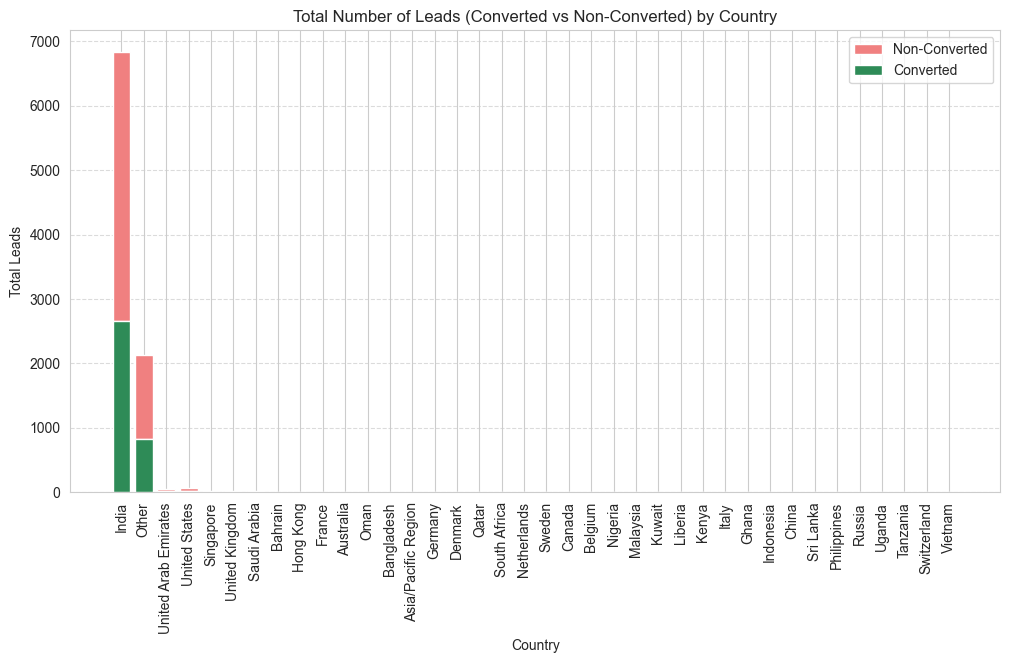

In [ ]:
# hypothesis 7: Country-wise conversions show differences
# Group by country to get total leads, converted, and non-converted leads
country_conversion = df.groupby("Country")["Converted"].agg(['sum', 'count']).reset_index()
country_conversion["non_converted"] = country_conversion["count"] - country_conversion["sum"]  # Total - Converted

# Sort by total conversions
country_conversion = country_conversion.sort_values(by="sum", ascending=False)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))

# Plot non-converted leads (bottom part of bar)
plt.bar(country_conversion["Country"], 
        country_conversion["non_converted"], 
        label="Non-Converted", 
        color="lightcoral",
        bottom=country_conversion["sum"])

# Plot converted leads (stacked on top)
plt.bar(country_conversion["Country"], 
        country_conversion["sum"], 
        label="Converted", 
        color="seagreen")

plt.title("Total Number of Leads (Converted vs Non-Converted) by Country")
plt.ylabel("Total Leads")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


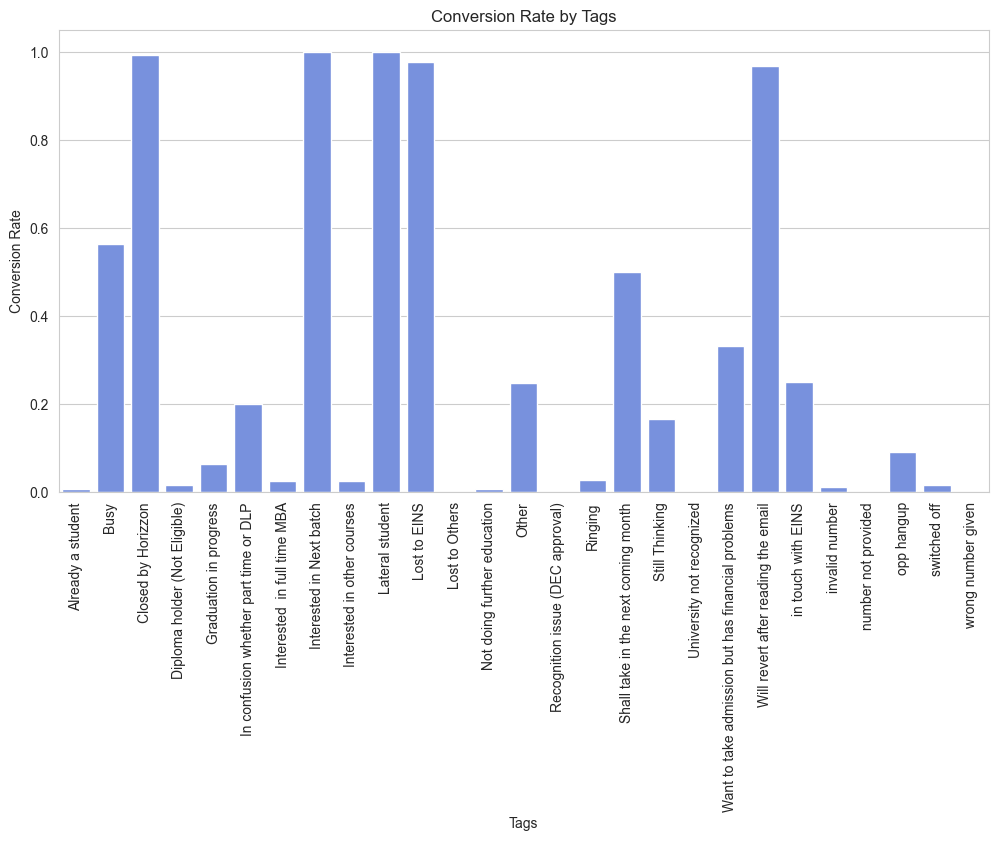

In [ ]:
# Hypothesis 8:tags
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby("Tags")["Converted"].mean().index, 
            y=df.groupby("Tags")["Converted"].mean().values)
plt.title("Conversion Rate by Tags")
plt.ylabel("Conversion Rate")
plt.xlabel("Tags")
plt.xticks(rotation=90)
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_20476\1362991366.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=career_factors.index, y=career_factors.values, palette="cool")


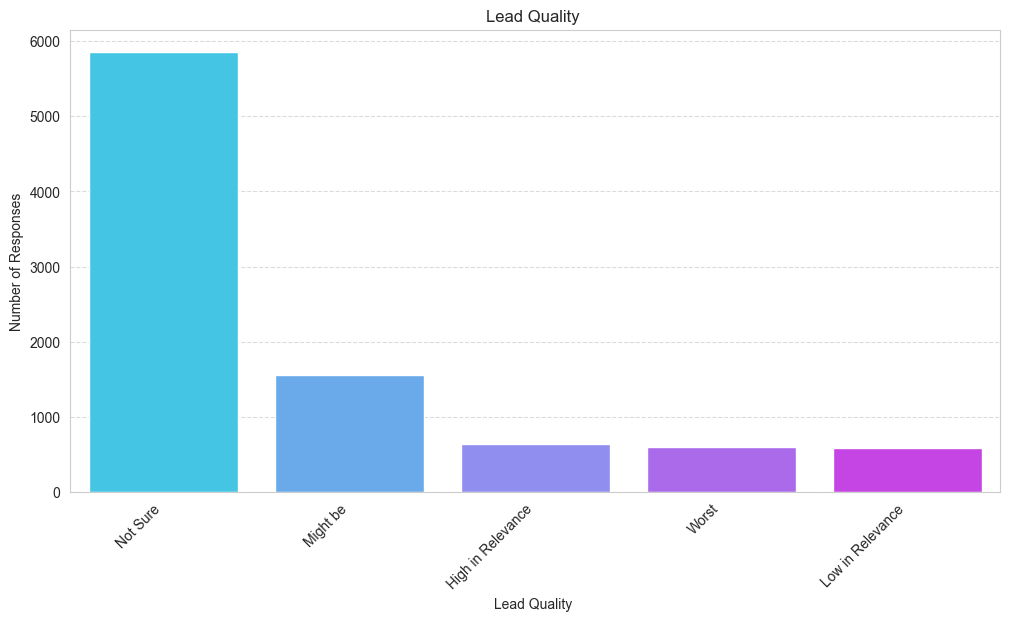

In [ ]:
# hypothesis 9: Lead Quality 

plt.figure(figsize=(12, 6)) 

# Count the occurrences of each response in the "What matters most to you in choosing a career" column
career_factors = df["Lead Quality"].value_counts()

# Plot the top career factors
sns.barplot(x=career_factors.index, y=career_factors.values, palette="cool")

plt.title("Lead Quality ")
plt.ylabel("Number of Responses")
plt.xlabel("Lead Quality ")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_20476\1969488823.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_conversion = df.groupby("Asymmetrique Activity Index")["Converted"].mean().reset_index()
C:\Users\varsh\AppData\Local\Temp\ipykernel_20476\1969488823.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Asymmetrique Activity Index",


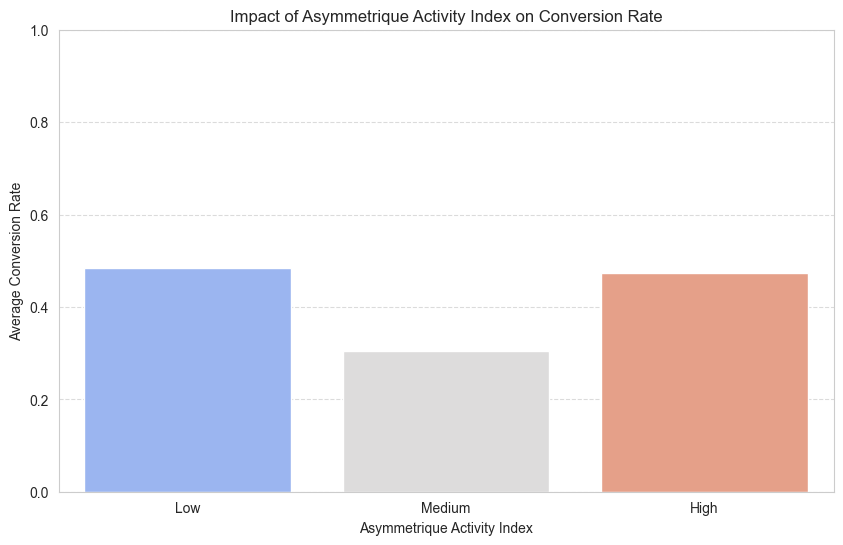

In [70]:
# Hypothesis 10: Asymmetrique Activity Index correlates with conversion rate
plt.figure(figsize=(10, 6))

# Ensure 'Asymmetrique Activity Index' is categorical and ordered correctly
df["Asymmetrique Activity Index"] = pd.Categorical(df["Asymmetrique Activity Index"], 
                                                   categories=["Low", "Medium", "High"], 
                                                   ordered=True)

# Calculate mean conversion rate for each category
activity_conversion = df.groupby("Asymmetrique Activity Index")["Converted"].mean().reset_index()

# Plot
sns.barplot(x="Asymmetrique Activity Index", 
            y="Converted", 
            data=activity_conversion, 
            order=["Low", "Medium", "High"],  # Ensure correct order
            palette="coolwarm")

plt.title("Impact of Asymmetrique Activity Index on Conversion Rate")
plt.ylabel("Average Conversion Rate")
plt.xlabel("Asymmetrique Activity Index")
plt.ylim(0, 1)  # Conversion rate is between 0 and 1
plt.yticks(np.arange(0, 1.2, 0.2))
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light grid for readability

plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_20476\3513324239.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Asymmetrique Profile Index",


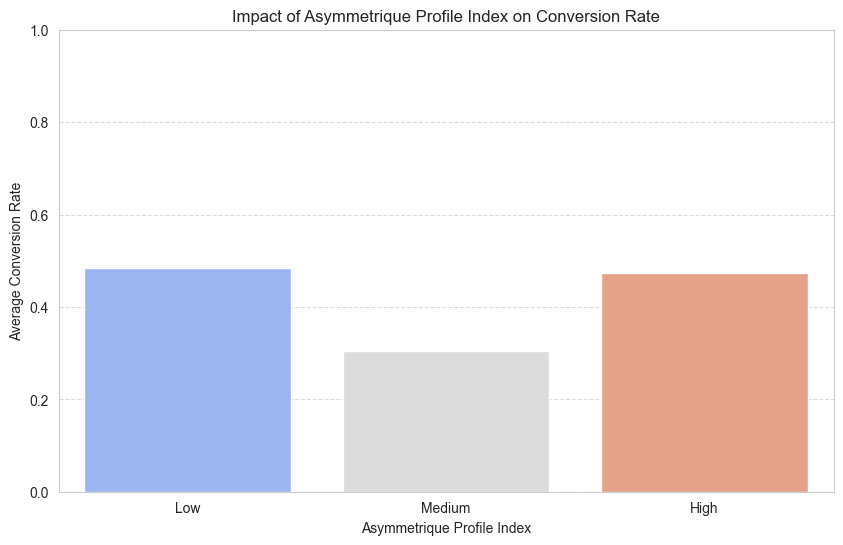

In [69]:
# hypothesis 11 : Asymmetrique Profile Index correlates with conversion rate
plt.figure(figsize=(10, 6))

df["Asymmetrique Activity Index"] = pd.Categorical(df["Asymmetrique Profile Index"], 
                                                   categories=["Low", "Medium", "High"], 
                                                   ordered=True)

activity_conversion = df.groupby("Asymmetrique Profile Index")["Converted"].mean().reset_index()

# Plot
sns.barplot(x="Asymmetrique Profile Index", 
            y="Converted", 
            data=activity_conversion, 
            order=["Low", "Medium", "High"],  # Ensure correct order
            palette="coolwarm")

plt.title("Impact of Asymmetrique Profile Index on Conversion Rate")
plt.ylabel("Average Conversion Rate")
plt.xlabel("Asymmetrique Profile Index")
plt.ylim(0, 1)  # Conversion rate is between 0 and 1
plt.yticks(np.arange(0, 1.2, 0.2))
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light grid for readability

plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_20476\3382291731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Converted"], y=df["Asymmetrique Activity Score"], palette="coolwarm")


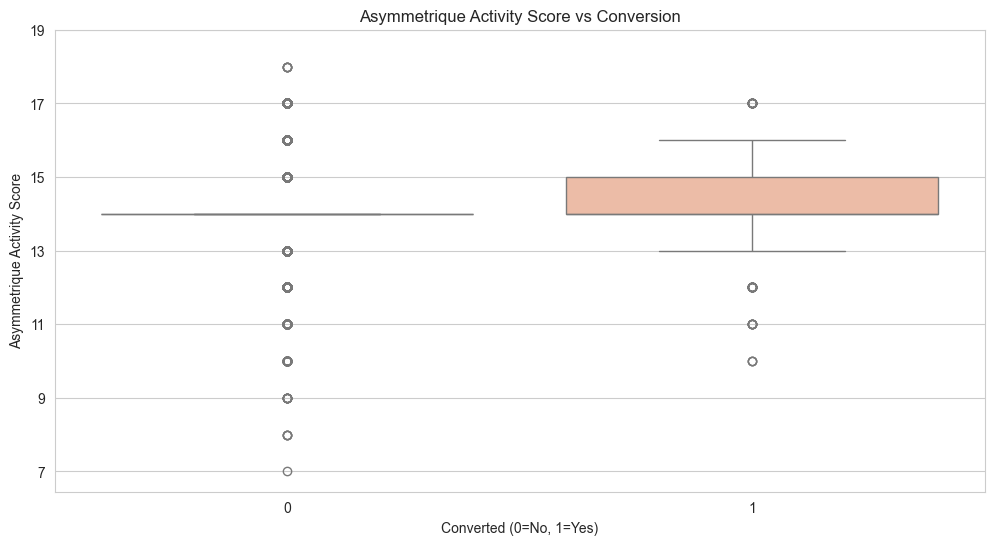

In [68]:
# Hypothesis 12: Asymmetrique Activity Score correlates with conversion rate
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Converted"], y=df["Asymmetrique Activity Score"], palette="coolwarm")
plt.title("Asymmetrique Activity Score vs Conversion")
plt.xlabel("Converted (0=No, 1=Yes)")
plt.ylabel("Asymmetrique Activity Score")
plt.yticks(range(7, 21, 2))
plt.show()


C:\Users\varsh\AppData\Local\Temp\ipykernel_20476\2820036173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Converted"], y=df["Asymmetrique Profile Score"], palette="coolwarm")


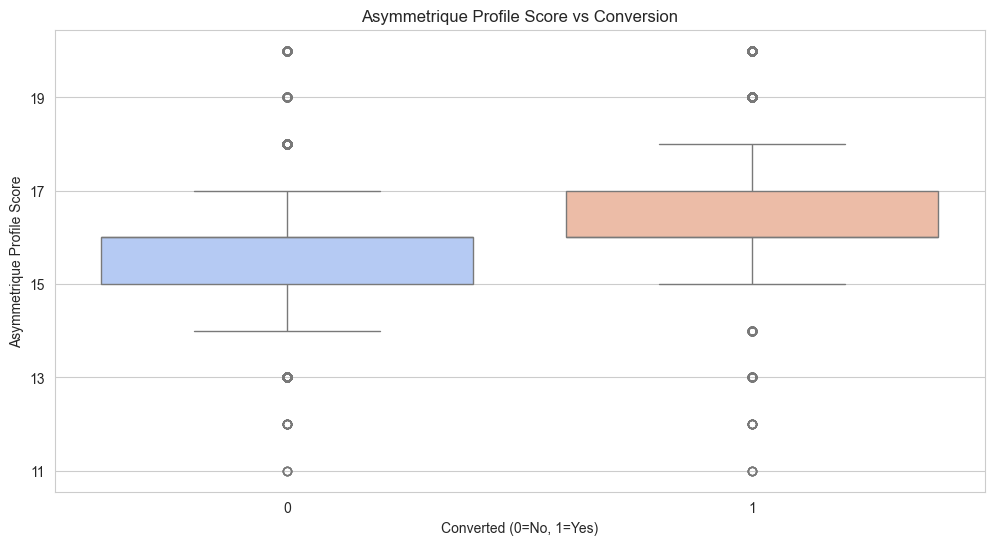

In [ ]:
# Hypothesis 13: Asymmetrique Profile Score correlates with conversion rate
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Converted"], y=df["Asymmetrique Profile Score"], palette="coolwarm")
plt.title("Asymmetrique Profile Score vs Conversion")
plt.xlabel("Converted (0=No, 1=Yes)")
plt.ylabel("Asymmetrique Profile Score")
plt.yticks(range(11, 21, 2))
plt.show()


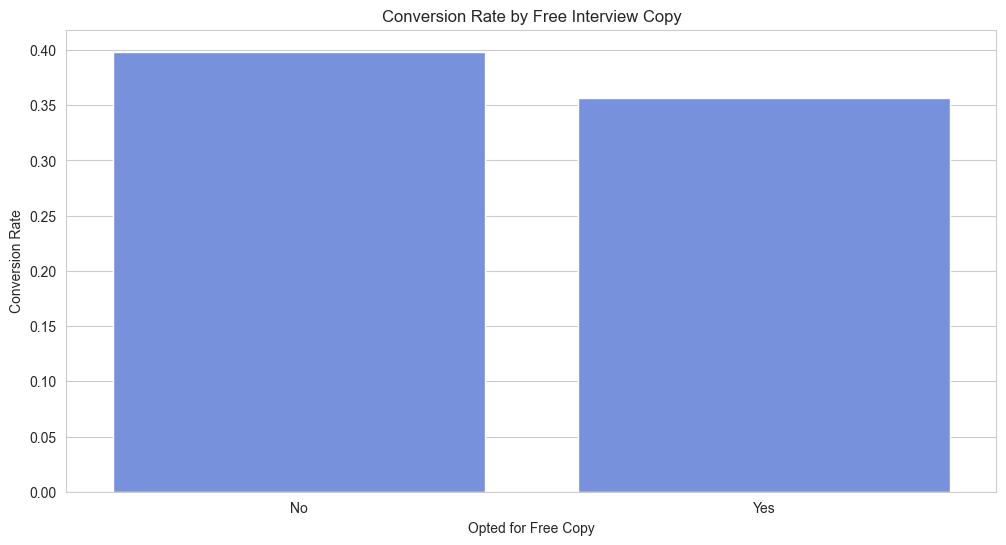

In [ ]:
# Hypothesis 14: Leads who opt for "A free copy of Mastering The Interview" convert at a higher rate
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby("A free copy of Mastering The Interview")["Converted"].mean().index, 
            y=df.groupby("A free copy of Mastering The Interview")["Converted"].mean().values)
plt.title("Conversion Rate by Free Interview Copy")
plt.ylabel("Conversion Rate")
plt.xlabel("Opted for Free Copy")
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_15456\1499733321.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_conversion.index, y=activity_conversion.values, palette="pastel")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Form Submitted on Website'),
  Text(1, 0, 'View in browser link Clicked'),
  Text(2, 0, 'Olark Chat Conversation'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Modified'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Page Visited on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Email Opened'),
  Text(9, 0, 'Unreachable'),
  Text(10, 0, 'SMS Sent'),
  Text(11, 0, 'Had a Phone Conversation'),
  Text(12, 0, 'Email Received'),
  Text(13, 0, 'Email Marked Spam'),
  Text(14, 0, 'Approached upfront'),
  Text(15, 0, 'Resubscribed to emails')])

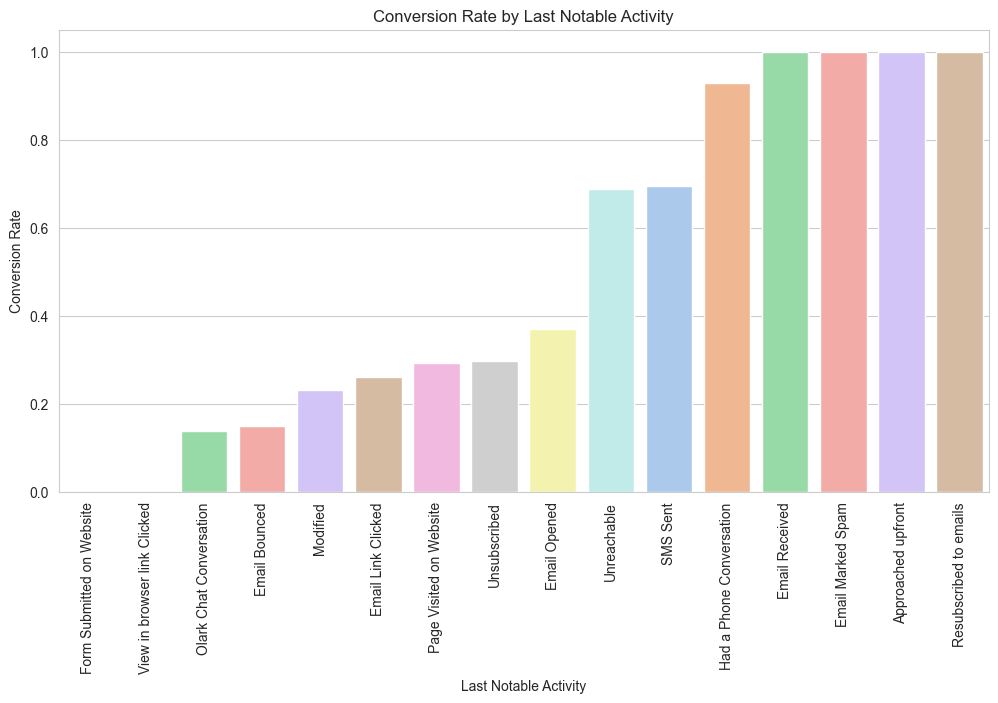

In [2]:
# Hypothesis 15: The last notable activity affects conversion
plt.figure(figsize=(12, 6))

activity_conversion = df.groupby("Last Notable Activity")["Converted"].mean().sort_values()
sns.barplot(x=activity_conversion.index, y=activity_conversion.values, palette="pastel")
plt.title("Conversion Rate by Last Notable Activity")
plt.xlabel("Last Notable Activity")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)


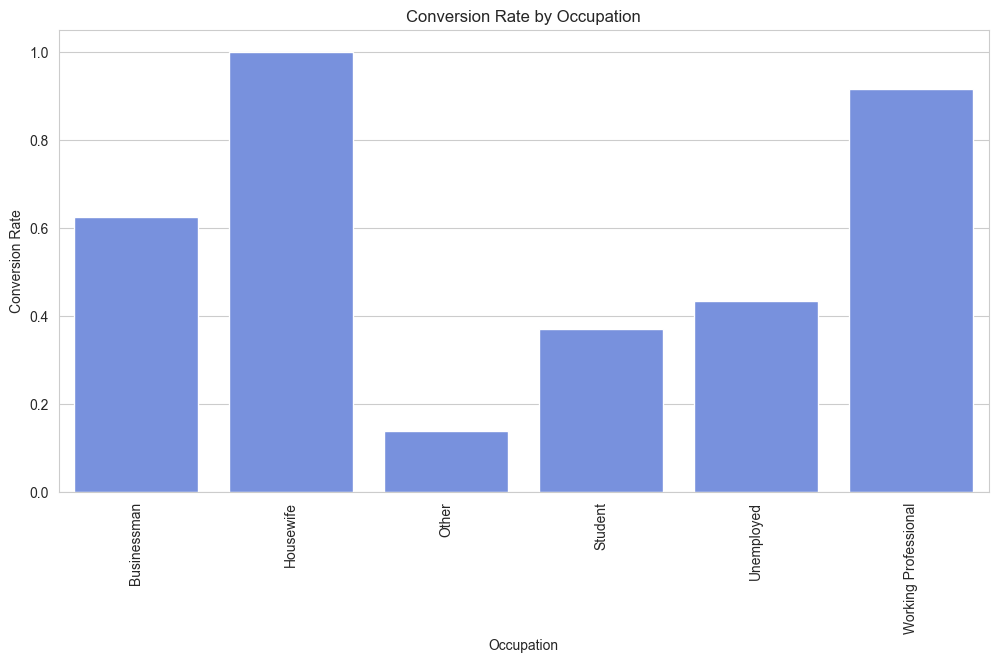

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby("What is your current occupation")["Converted"].mean().index, 
            y=df.groupby("What is your current occupation")["Converted"].mean().values)
plt.title("Conversion Rate by Occupation")
plt.ylabel("Conversion Rate")
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.show()